In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
from lifelines.statistics import logrank_test, KaplanMeierFitter

In [4]:
learning_data = pd.read_csv('LearningResults.csv')

In [5]:
learning_data = learning_data[np.isin(learning_data['STATUS'], [0, 1, 2])]

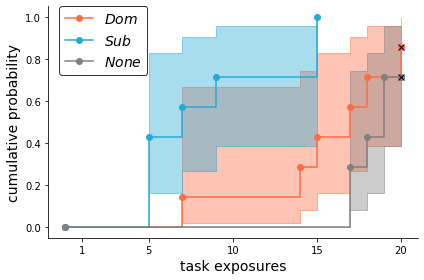

In [22]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 4))

dom_color = tuple(v / 255 for v in (255, 109, 69))
sub_color = tuple(v / 255 for v in (39, 170, 214))

colors = [dom_color, sub_color, (0.5, 0.5, 0.5)]
labels = [r'$Dom$', r'$Sub$', r'$None$']

for color_idx, status in enumerate([1, 2, 0]):
    data = learning_data[(learning_data['STATUS'] == status)]
    
    curve = (np.array(data['TRIAL']), np.array(data['SURVIVAL']))
    fit_result = km.fit(*curve)
    
    ax.step(fit_result.timeline, 1 - fit_result.survival_function_, 'o-', where='post',
                 color=colors[color_idx], label=labels[color_idx], zorder=1)
    
    curves.append(curve)
    
    ci_upper = np.array(fit_result.confidence_interval_survival_function_.iloc[:, 0])
#     ci_upper[np.invert(np.isfinite(ci_upper))] = 1
    ci_lower = np.array(fit_result.confidence_interval_survival_function_.iloc[:, 1])
#     ci_lower[np.invert(np.isfinite(ci_lower))] = 1
    
    ax.fill_between(fit_result.timeline, 1 - ci_lower, 1 - ci_upper, step='post', alpha=0.4, color=colors[color_idx], zorder=0)
    ax.step(fit_result.timeline, 1 - ci_lower, lw=0.5, alpha=0.25, where='post', color=colors[color_idx], zorder=0)
    ax.step(fit_result.timeline, 1 - ci_upper, lw=0.5, alpha=0.25, where='post', color=colors[color_idx], zorder=0)
    if status in [0, 1]:
        ax.plot(np.array(fit_result.timeline)[-1], np.array(1 - fit_result.survival_function_)[-1], 'kx')
ax.set_xticks([1, 5, 10, 15, 20])
ax.set_xticklabels([1, 5, 10, 15, 20])

ax.set_ylabel('cumulative probability', fontsize=14)
ax.set_xlabel('task exposures', fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(fancybox=True, edgecolor='k', fontsize=14, loc='upper left', bbox_to_anchor=(0.03, 1), borderaxespad=0)

fig.tight_layout()

plt.show()

In [7]:
print('combined vs control')
test_result = logrank_test(curves[0][0], curves[1][0], curves[0][1], curves[1][1])
print(test_result.p_value)

combined vs control
0.014792662711985106


In [8]:
learning_data

,REPLICATE,STATUS,DEMONSTRATOR,TRIAL,7 RESPOND TWICE,SURVIVAL
0,1,0,0,20,0,0
1,1,1,1,18,1,1
2,1,2,1,5,1,1
4,2,0,0,17,1,1
5,2,1,1,7,1,1
6,2,2,1,7,1,1
8,3,0,0,19,1,1
9,3,1,1,20,0,0
10,3,2,1,15,1,1
12,4,0,0,18,1,1


In [17]:
print('dom vs control')
test_result = logrank_test(curves[0][0], curves[2][0], curves[0][1], curves[2][1])
print(test_result.p_value)
test_result.print_summary()

dom vs control
0.28760357280094473
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic    p  -log2(p)
           1.13 0.29      1.80


In [18]:
print('sub vs control')
test_result = logrank_test(curves[1][0], curves[2][0], curves[1][1], curves[2][1])
print(test_result.p_value)
test_result.print_summary()

sub vs control
0.00018351013188760138
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          13.99 <0.005     12.41


In [19]:
print('sub vs dom')
test_result = logrank_test(curves[1][0], curves[0][0], curves[1][1], curves[0][1])
print(test_result.p_value)
test_result.print_summary()

sub vs dom
0.01479266271198507
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic    p  -log2(p)
           5.94 0.01      6.08
